In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import mne
import os

In [60]:
raw = mne.io.read_raw_edf('data/chb01/chb01_01.edf',  stim_channel='auto', verbose=False, preload=True)

<ipython-input-60-dd2358da7783>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('data/chb01/chb01_01.edf',  stim_channel='auto', verbose=False, preload=True)


In [65]:
info = raw.info
sfreq = info['sfreq']
print(info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, ...
    chs : list | 23 items (EEG: 23)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 10.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 50.0 Hz
    meas_date : tuple | 1976-11-06 11:42:54 GMT
    nchan : int | 23
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name

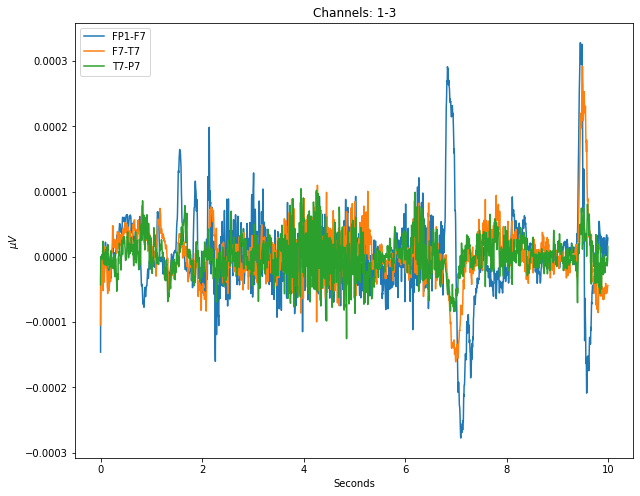

In [62]:
# Plot data for 23 channels over the first ten seconds
num_channels = 3
start = 0
stop = 10
data, times = raw[:num_channels, int(sfreq*start):int(sfreq*stop)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T)
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-' + str(num_channels));
plt.legend(raw.ch_names[:num_channels]);

In [63]:
raw.filter(l_freq=10, h_freq=50, fir_design='firwin', skip_by_annotation='edge')

<RawEDF  |  chb01_01.edf, n_channels x n_times : 23 x 921600 (3600.0 sec), ~161.8 MB, data loaded>

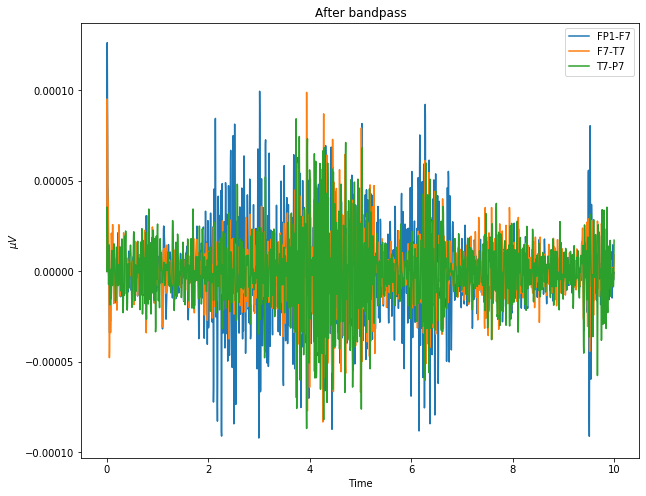

In [64]:
filtered_data, f_times = raw[:num_channels, int(start*sfreq):int(stop*sfreq)]

fig, ax = plt.subplots(figsize=(10,8))
plt.plot(f_times, filtered_data.T)
plt.title('After bandpass')
ax.set_xlabel('Time')
ax.set_ylabel('$\mu V$')
plt.legend(raw.ch_names[:num_channels])

In [120]:
def get_montage(patient_num:str='', path=''):
    if not path:
        patient = 'chb' + patient_num
        path = 'data/' + patient + '/' + patient + '-summary.txt'

    f = open(path).readlines()
    montage = f[5:28]
    montage = [x.split(': ')[1] for x in montage if len(x.split(': ')) > 1]
    return ''.join(montage)
        

In [121]:
montage = get_montage(patient_num='01')
print(montage)

FP1-F7
F7-T7
T7-P7
P7-O1
FP1-F3
F3-C3
C3-P3
P3-O1
FP2-F4
F4-C4
C4-P4
P4-O2
FP2-F8
F8-T8
T8-P8
P8-O2
FZ-CZ
CZ-PZ
P7-T7
T7-FT9
FT9-FT10
FT10-T8
T8-P8



In [122]:
def format(n):
    if n < 10:
        return '0'+ str(n)
    return str(n)

In [148]:
montages = {}
for i in range(1, 24):
    patient = format(i)
    montage = get_montage(patient)
    montages[i] = montage

In [164]:
raw.pick_channels(montages[13].split('\n'))

<RawEDF  |  chb01_01.edf, n_channels x n_times : 17 x 921600 (3600.0 sec), ~119.6 MB, data loaded>

In [167]:
events = find_events(raw, shortest_event=0, stim_channel='STI 014', verbose=False)

epochs = Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True, verbose=False)

# remove channels that aren't eeg electrodes we care about
epochs.drop_channels(ch_names=['Nose', 'REOG', 'LEOG', 'IEOG', 'SEOG', 'M1', 'M2','EXG8'])

# Export data in tabular structure as a pandas DataFrame.
epochs_df = epochs.to_data_frame()


evoked = epochs['target'].average()
evoked.plot();
raw_no_ref, _ = mne.set_eeg_reference(raw, [])
epochs_params = dict(events=events, event_id=event_id['target'], tmin=tmin, tmax=tmax)

evoked_no_ref = Epochs(raw_no_ref, **epochs_params).average()
evoked_no_ref.drop_channels(ch_names=['Nose', 'REOG', 'LEOG', 'IEOG', 'SEOG', 'M1', 'M2','EXG8'])

title = 'EEG Original reference'
evoked_no_ref.plot(titles=dict(eeg=title), time_unit='s')

evoked_no_ref.plot_topomap(times=[0.1], size=3., title=title, time_unit='s');

NameError: name 'find_events' is not defined